In [1]:
from main import Statistics_ai

petal_width_ci = Statistics_ai(test='petal_width', alph=99)

In [2]:
  
petal_width_ci.confidence_interval()

Confidence interval with confidence grade of 99 for petal_width of the dataframes are: 
 
setosa["petal_width"] between 0.203 and 0.285 

verginica["petal_width"] between 1.922 and 2.13 

versicolor["petal_width"] between 1.251 and 1.401 



In [3]:
petal_width_ci.description('setosa')

Description for setosa 
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000



In [4]:
petal_width_ci.variance_hypothesis_test(noll_df='setosa' ,other_df='versicolor', sub_df='sepal_width')

1.4743626943005181 0.6221654675017775


In [5]:
petal_width_ci.mean_hypothesis_test(noll_df='setosa' ,other_df='versicolor', sub_df='sepal_width')

hypothesis rejected because p_value(5.879601468409086e-15) is less than 0.05 which is the significance level

 Alternatively, We could compare the result.statistic from the ttest_ind 

hypothesis rejected because t_statistic(9.28277255555811) is greater than 0.95 which is the significance level


In [6]:
petal_width_ci.mean_hypothesis_statsmodel(noll_df='setosa' ,other_df='versicolor', sub_df='sepal_width')



 using the statsmodel we get (-43.06829516919015, 1.0, 14.88662710248762)


In [7]:
versi_petal = Statistics_ai(test='sepal_width', alph=95)
versi_petal.description('versicolor')

Description for versicolor 
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.600000     1.500000
max        7.000000     3.400000      5.100000     1.800000



In [8]:
petal_width_ci.compare_means(noll_df='setosa' ,other_df='versicolor', sub_df='sepal_width')



 using the statsmodel compare means, I can conclude that, using 0.05 significance level, setosa[sepal_width] is greater than versicolor[sepal_width] by a value found with get the lower ci: 0.509407152606611 and upper ci 0.7865928473933893


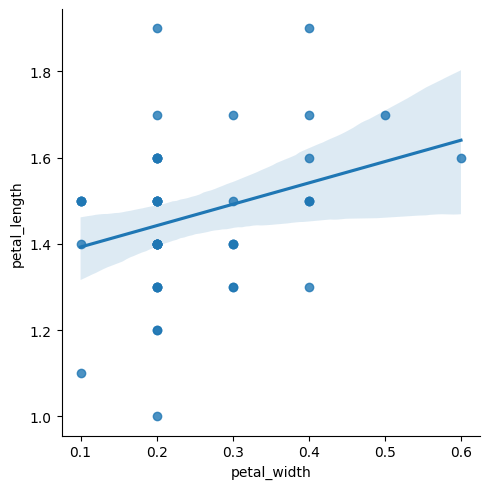

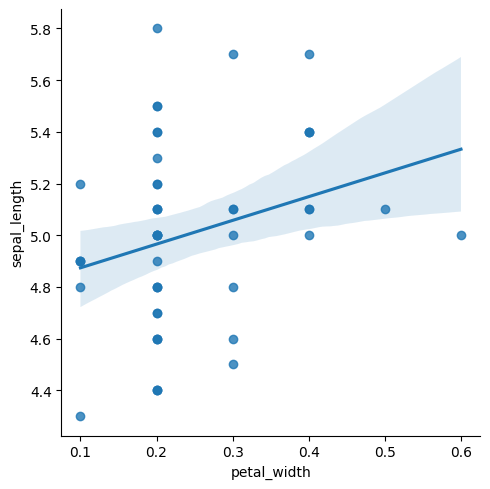

c:\Users\CYRILLE\OneDrive\Skrivbord\python\statistics-ai\code\main.py:154: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


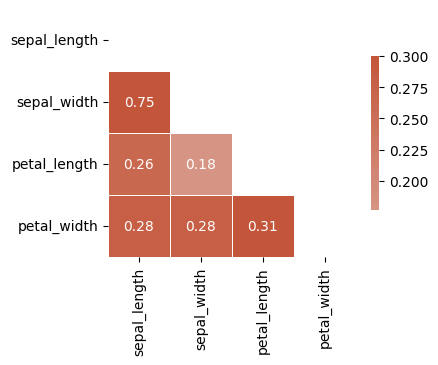

In [9]:
petal_width_ci.correlation_within_specy('setosa', 'petal_length')
petal_width_ci.correlation_within_specy('setosa', 'sepal_length')
petal_width_ci.correlation_heat_map('setosa')


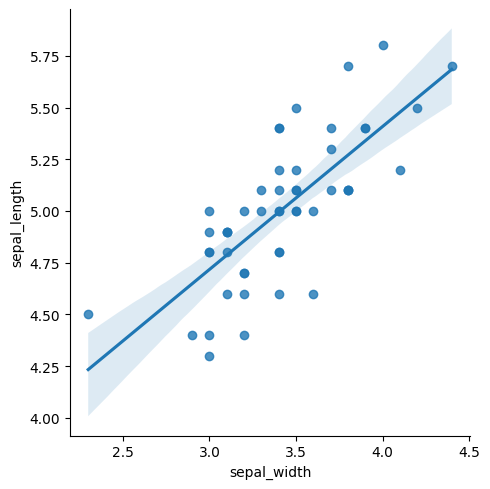

In [10]:
sepal_w = Statistics_ai('sepal_width', alph=95)

sepal_w.correlation_within_specy('setosa','sepal_length')

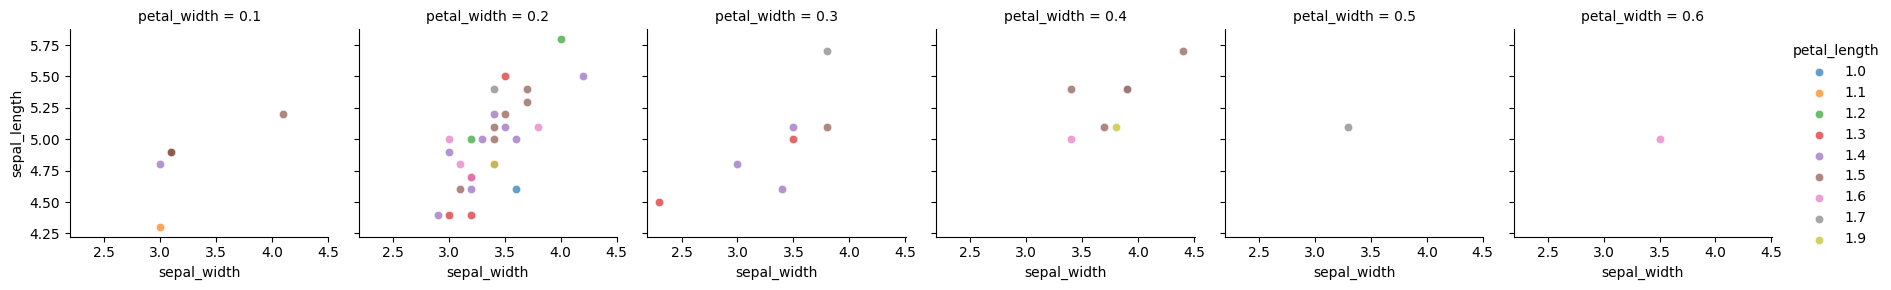

In [11]:
petal_width_ci.diagrams('setosa', 'petal_length')